In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten,MaxPooling2D, Input, Normalization, Resizing, RandomFlip, RandomRotation,RandomZoom
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import cv2
from tensorflow.keras.callbacks import EarlyStopping

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

In [3]:
path = "/content/drive/MyDrive/Newdata/colorNormalized"
labels = ["Adino", "SCC", "SIL"]

In [4]:
image_data,label_data = [],[]
print("start reading")
for l in labels:
    data_path = os.path.join(path,l)
    for f in os.listdir(data_path):
        image = cv2.imread(os.path.join(data_path, f))
        image_data = cv2.resize(matched, (144,144))
        image_data.append(image_data)
        label_data.append(labels.index(l)) ## only taking index of the label (Eg. 1 for Normal, 2 for Precancer ...)
print("Finished")

start reading


NameError: ignored

In [ ]:
image_data = np.array(image_data)
label_data = np.array(label_data)

In [ ]:
sample_image = image_data[1]
sample_image_label = label_data[1]

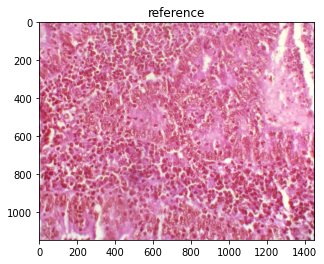

In [ ]:
plt.imshow(reference)
plt.title("reference")
plt.show()

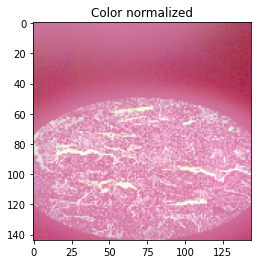

In [ ]:
plt.imshow(sample_image)
plt.title("Color normalized")
plt.show()

In [ ]:
orig_path = "/content/drive/MyDrive/Newdata/Adino/WP_20200823_112.jpg"
original = cv2.imread(orig_path)

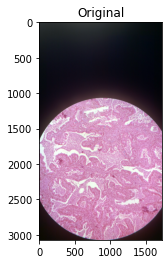

In [ ]:
plt.imshow(original)
plt.title("Original")
plt.show()

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(image_data, label_data, test_size = 0.3, shuffle = True)

In [ ]:
train_y_cat = to_categorical(train_y, num_classes = 3)
val_y_cat = to_categorical(val_y, num_classes = 3)

In [ ]:
def first_cnn():
    model = Sequential()
    model.add(Conv2D(512, (3,3), activation = 'relu', input_shape=(144,144,3)))
    model.add(Conv2D(256, (3,3), activation ='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (3,3), activation ='relu'))
    model.add(MaxPooling2D(2))
    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    return model

In [ ]:
model = first_cnn()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 512)     14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 256)     1179904   
                                                                 
 dropout (Dropout)           (None, 140, 140, 256)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 138, 138, 256)     590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 69, 69, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1218816)           0         
                                                        

In [ ]:
## early stopping mechanism
es = EarlyStopping(monitor ='val_accuracy', mode = 'max', patience = 10)

In [ ]:
history = model.fit(train_x, train_y_cat, epochs = 50, batch_size = 32, validation_data = (val_x, val_y_cat))

Epoch 1/50
11/11 [==============================] - 31s 3s/step - loss: 0.9919 - accuracy: 0.5477 - val_loss: 1.0960 - val_accuracy: 0.5714
Epoch 2/50
11/11 [==============================] - 31s 3s/step - loss: 0.9905 - accuracy: 0.5477 - val_loss: 1.0961 - val_accuracy: 0.5714
Epoch 3/50
11/11 [==============================] - 31s 3s/step - loss: 0.9737 - accuracy: 0.5477 - val_loss: 1.0962 - val_accuracy: 0.5714
Epoch 4/50
11/11 [==============================] - 31s 3s/step - loss: 0.9705 - accuracy: 0.5477 - val_loss: 1.0962 - val_accuracy: 0.5714
Epoch 5/50
11/11 [==============================] - 31s 3s/step - loss: 0.9666 - accuracy: 0.5477 - val_loss: 1.0965 - val_accuracy: 0.5714
Epoch 6/50
11/11 [==============================] - 31s 3s/step - loss: 0.9780 - accuracy: 0.5477 - val_loss: 1.0967 - val_accuracy: 0.5714
Epoch 7/50
11/11 [==============================] - 31s 3s/step - loss: 0.9692 - accuracy: 0.5477 - val_loss: 1.0965 - val_accuracy: 0.5714
Epoch 8/50
11/11 [==

In [ ]:
import json
hst = open(r"drive/My Drive/Newdata/firstcnnmodel_hist.json", 'w')
json.dump(history.history, hst)

In [ ]:
model.save_weights(r"drive/My Drive/Newdata/firstcnnmodel.h5")

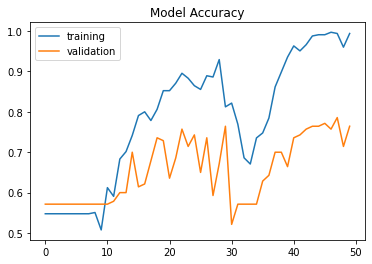

In [ ]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label = 'training')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

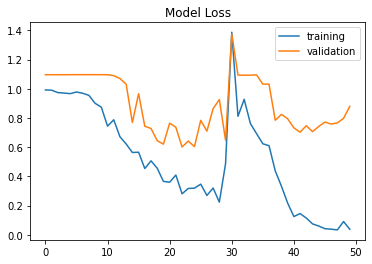

In [ ]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(val_x)

In [ ]:
cm = confusion_matrix(val_y_cat, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show(

SyntaxError: ignored